In [74]:
%matplotlib inline

In [75]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

# Problem Set 4 (covers Lab 7)

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Introduction

Lab 7 was all about statistical inference, specifically, Bayesian statistical inference. You will use Bayesian inference on four  problems for this Problem Set [Goto Q1](#q1). You can paste all your code here:

<a id="q1"></a>
**Question 1.**

Fifteen volunteers were put on the Supper Dooper Human Kibble Diet(tm) for a month. They were weighed before and after 30 days. The makers of Supper Dooper Human Kibble Diet(tm) are anxious to see the results of this study because they are planning to offer a money back guarantee of "Lose 10 Pounds in 30 days or your money back!".

Based on the data, 

1. what is the probability that this claim can be made? 
2. If daily weight fluctuations can equal 5 pounds (in either direction). How probable is it that the diet doesn't work?
3. Is there a positive claim can be made with at least ~66% belief?

In [35]:
data1 = {}
data1["start"] = [129, 174, 200, 229, 205, 133, 143, 222, 161, 201, 194, 181, 185, 126, 212]
data1["end"] = [134, 171, 190, 227, 206, 130, 129, 218, 138, 187, 191, 177, 183, 124, 205]


### What is the probability that this claim can be made? 

The method is from the Statistical Inference notebook. 
1. resample the observations 
2. calculate and plot the difference
3. calculate the probability of the difference >= 10 

In [36]:
import random

def resample( data):
    n = len( data)    
    return [ data[ i] for i in [random.randint(0, n - 1) for _ in range( 0, n)]]

In [37]:
data1["start"] = np.array(data1["start"])
data1["end"] = np.array(data1["end"])

data = {}
data[ "start"] = np.array([np.mean( data) for data in [resample( data1[ "start"]) for i in range( 0, 10000)]])
data[ "end"] = np.array([np.mean( data) for data in [resample( data1[ "end"]) for i in range( 0, 10000)]])

data[ "difference"] = data[ "start"] - data[ "end"]

print ("P(difference >= 10 Pounds)", np.mean( data[ "difference"] >= 10))

P(difference >= 10 Pounds) 0.3611


Text(0.5,1,'Difference')

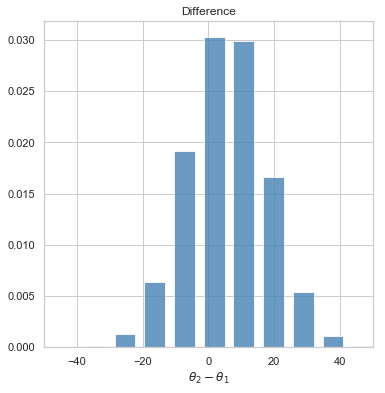

In [39]:
figure = plt.figure(figsize=(20,6))

ys, bins = np.histogram( data[ "difference"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 3)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([-50.0, 50.0])
axes.set_xlabel( r"$\theta_2 - \theta_1$")
axes.set_title( "Difference")

### If daily weight fluctuations can equal 5 pounds (in either direction). How probable is it that the diet doesn't work?

1. Make a flucturation of 5 pounds in the Resample function as the daily weight fluctuations can equal 5 pounds. 
2. Resample 
3. Calculate the probability 

In [76]:
import random

def resample( data):
    n = len( data)
    flucturation = (random.randint(0,1) - 1)* 5
    return [ data[ i] + flucturation for i in [random.randint(0, n - 1) for _ in range( 0, n)]]

In [20]:
data2 = {}
data2[ "start"] = np.array([np.mean( data) for data in [resample( data1[ "start"]) for i in range( 0, 10000)]])
data2[ "end"] = np.array([np.mean( data) for data in [resample( data1[ "end"]) for i in range( 0, 10000)]])
data2[ "difference"] = data2[ "start"] - data2[ "end"]

print ("P(difference >= 10 Pounds)", np.mean( data2[ "difference"] >= 10))

P(difference >= 10 Pounds) 0.3677


### Is there a positive claim can be made with at least ~66% belief?
1. Yes. Because at the 66% belief, the difference is bigger than 10 

In [22]:
stats.mstats.mquantiles( data2[ "difference"], [0.0, 0.66])

array([-46.73333333,  10.86666667])

**Question 2.**

The Acme Company has developed a new battery. The engineer in charge claims that the new battery will operate continuously for at least 7 minutes longer than the old battery.

To test the claim, the company selects a simple random sample of 100 new batteries and 100 old batteries. The data is provided below.

Based on the data,

1. Test the engineer's claim that the new batteries run at least 7 minutes longer than the old. 
2. If plus or minus 5 minutes is "equivalent", what is the probability that the batteries have the same operating life?

In [23]:
data2 = {}
data2["old"] = [161, 184, 138, 178, 188, 175, 195, 214, 183, 184, 195, 196, 150, 206, 185, 202, 216, 186, 153, 174, 217, 217, 178, 172, 205, 192, 172, 222, 197, 174, 163, 206, 176, 176, 230, 202, 267, 186, 190, 200, 182, 160, 225, 185, 205, 213, 189, 171, 166, 239, 170, 198, 198, 198, 211, 194, 197, 212, 194, 236, 163, 218, 221, 189, 182, 182, 202, 172, 165, 180, 214, 186, 191, 179, 191, 204, 209, 212, 141, 188, 193, 192, 185, 199, 144, 146, 231, 201, 177, 191, 197, 182, 174, 231, 202, 195, 161, 187, 181, 186]
data2["new"] = [196, 245, 196, 243, 181, 161, 173, 151, 148, 195, 247, 164, 167, 234, 200, 215, 204, 190, 148, 127, 174, 135, 231, 199, 125, 138, 140, 206, 139, 177, 260, 231, 173, 172, 178, 224, 186, 115, 144, 222, 189, 107, 239, 124, 216, 169, 212, 262, 145, 221, 179, 192, 142, 232, 171, 233, 287, 216, 188, 156, 169, 238, 128, 155, 202, 174, 229, 198, 192, 169, 156, 238, 178, 220, 177, 191, 234, 251, 166, 123, 144, 127, 203, 230, 203, 188, 185, 255, 239, 227, 173, 196, 208, 236, 194, 204, 217, 252, 169, 166]

#### Create a Resample function. 

In [77]:
import random

def resample( data):
    n = len( data)    
    return [ data[ i] for i in [random.randint(0, n - 1) for _ in range( 0, n)]]

### Test the engineer's claim that the new batteries run at least 7 minutes longer than the old.
1. Resample the data
2. Calculate the difference 
3. Plot the difference

In [45]:
data2["old"] = np.array(data2["old"])
data2["new"] = np.array(data2["new"])

data = {}
data[ "old"] = np.array([np.mean( data) for data in [resample( data2[ "old"]) for i in range( 0, 10000)]])
data[ "new"] = np.array([np.mean( data) for data in [resample( data2[ "new"]) for i in range( 0, 10000)]])

data[ "difference"] = data[ "new"] - data[ "old"]
print(np.average(data[ "difference"]))

-0.511457


Text(0.5,1,'Difference')

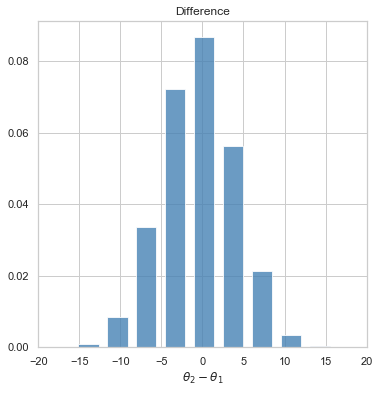

In [42]:
figure = plt.figure(figsize=(20,6))

ys, bins = np.histogram( data[ "difference"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 3)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([-20.0, 20.0])
axes.set_xlabel( r"$\theta_2 - \theta_1$")
axes.set_title( "Difference")

In [43]:
print ("P(difference >= 7 minutes)", np.mean( data[ "difference"] >= 7))
print ("95% CI", stats.mstats.mquantiles( data[ "difference"], [0.025, 0.975]))

P(difference >= 7 minutes) 0.0462
95% CI [-9.2319  8.0819]


The probability that the new battery lasts 7 minutes longer is very low. Also, the 95% confident interval cross 0, we cannot make make a conclusion that the new battery lasts longer than the old one. 

### If plus or minus 5 minutes is "equivalent", what is the probability that the batteries have the same operating life?

In [ ]:
data = {}
data[ "old"] = np.array([np.mean( data) for data in [resample( data2[ "old"]) for i in range( 0, 10000)]])
data[ "new"] = np.array([np.mean( data) for data in [resample( data2[ "new"]) for i in range( 0, 10000)]])

data[ "difference"] = data[ "new"] - data[ "old"]

In [59]:
print ("P(difference within 5 minutes)", np.mean((data[ "difference"] > -5) & (data[ "difference"] < 5)))

P(difference within 5 minutes) 0.7309


**Question 3.**

In a recent survey, on an important question of economic revitalization, men and women responded as follows:

```
                   Response
                     Yes  No  Total
       Gender    Men  30  70  100
               Women  45  55  100
```

Based on the data, what is the probability that the women were in favor of the question? 

In [78]:
survey = {}
survey["Men"] = np.array([1] * 30 + [0] * 70)
survey["Women"] = np.array([1] * 45 + [0] * 55)

Again, we are going to resample the sample data. 

In [79]:
survey[ "Men"] = np.array([np.mean( data) for data in [resample( survey[ "Men"]) for i in range( 0, 10000)]])
survey[ "Women"] = np.array([np.mean( data) for data in [resample( survey[ "Women"]) for i in range( 0, 10000)]])
survey[ "difference"] = survey[ "Women"] - survey[ "Men"]

Calculate the difference and plot the data

Text(0.5,1,'Difference')

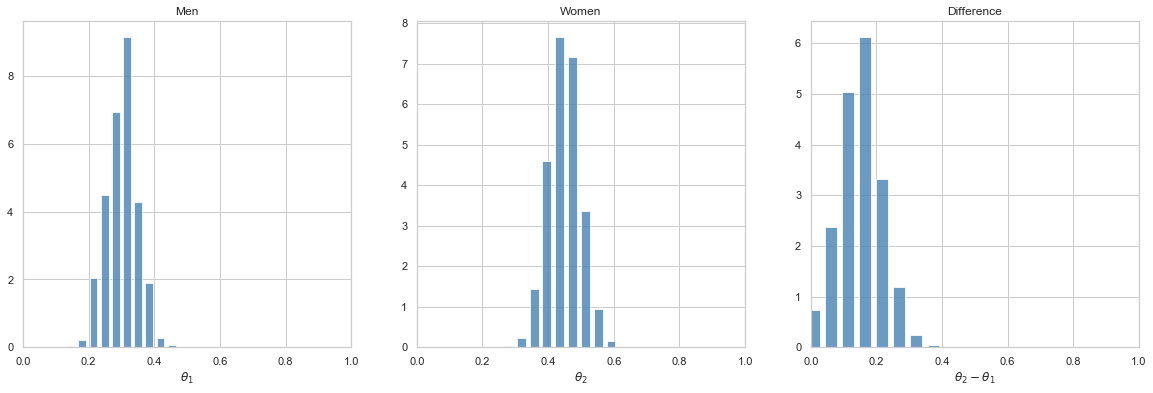

In [80]:
ys, bins = np.histogram( survey[ "Men"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_1$")
axes.set_title( "Men")

ys, bins = np.histogram( survey[ "Women"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 2)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_2$")
axes.set_title( "Women")

ys, bins = np.histogram( survey[ "difference"], bins=10, density=True)
width = 0.7*(bins[ 1] - bins[ 0])
center = (bins[ :-1]+bins[1:])/2

axes = figure.add_subplot(1, 3, 3)

axes.bar( center, ys, align='center', width=width, color="steelblue", alpha=0.8)
axes.set_xlim([0, 1])
axes.set_xlabel( r"$\theta_2 - \theta_1$")
axes.set_title( "Difference")

In [83]:
print ("P(difference > 0 )", np.mean( survey[ "difference"] > 0.0))
print ("95% CI", stats.mstats.mquantiles( survey[ "difference"], [0.025, 0.975]))

P(difference > 0 ) 0.9846
95% CI [0.02 0.28]


The probability that women is in favor of the survery is 98.5%. The 95% CI is between 0.02 and 0.28

**Question 4.**

In the above question you were able to regenerate the data. In the case of a continuous numeric variable, we're not exactly able to do this. However, given a parameterization and some assumptions about the underlying distribution, there are two possible approaches to solving this problem.

1. We could generate a single sample of size N from the distribution and do M bootstrap samples. (Method 1).
2. We could generate M samples of size N directly from the distribution. (Method 2).

Compare these approaches with the following problem:

"Within a school district, students were randomly assigned to one of two Math teachers - Mrs. Smith and Mrs. Jones. After the assignment, Mrs. Smith had 30 students, and Mrs. Jones had 25 students.

"At the end of the year, each class took the same standardized test. Mrs. Smith's students had an average test score of 78, with a standard deviation of 10; and Mrs. Jones' students had an average test score of 85, with a standard deviation of 15.

"What is the probability that Mrs. Smith and Mrs. Jones are equally effective teachers."

Using N = 100 and M = 100:

1. Define what "equally effective might mean".
2. Answer the question using Method 1.
3. Answer the question using Method 2.
4. Comment on any observed similarities or differences between the two results.

"equally effective" might mean that there is no difference in the average score between two classes at a certain confidence level 

### Method 1 (assume the average test score follows a normal distribution)

Step 1: generate a single sample of size N

In [120]:
scores = {}
scores["Smith"] =np.random.normal(78, 10, 30)
scores["Jones"] =np.random.normal(85, 15, 25)

Step 2: do M bootstrap samples

In [121]:
scores1={}
scores1["Smith"] = np.array([np.mean( data) for data in [resample( scores["Smith"]) for i in range( 0, 500)]])
scores1["Jones"] = np.array([np.mean( data) for data in [resample( scores["Jones"]) for i in range( 0, 500)]])

Step 3: calculate the difference, probability and confidence intervals

In [122]:
scores1["difference"] = scores1["Smith"]  - scores1["Jones"]
print ("P(difference > 0 )", np.mean( scores1[ "difference"] > 0.0))
print ("95% CI", stats.mstats.mquantiles( scores1[ "difference"], [0.025, 0.975]))

P(difference > 0 ) 0.038
95% CI [-11.73803151   0.60422096]


The probability that there is a significant difference between two classes is small. The 95% confidence interval is between -11 and 0.6

### Method 2 (assume the average test score follows a normal distribution)

Step 1: generate M samples of size N

In [123]:
scores = {}
M = 500
scores["Smith"] =np.random.normal(78, 10, 500)
scores["Jones"] =np.random.normal(85, 15, 500)

Step 2: calculate the difference, probability and confidence intervals

In [124]:
scores["difference"] = scores["Smith"]  - scores["Jones"]
print ("P(difference > 0 )", np.mean( scores[ "difference"] > 0.0))
print ("95% CI", stats.mstats.mquantiles( scores[ "difference"], [0.025, 0.975]))

P(difference > 0 ) 0.334
95% CI [-44.79763946  31.10463748]


The probability that there is a significant difference between two classes is still small. The 95% confidence interval is between -44 and 31. We still cannot say there is significant difference between two groups. 